# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post]() by yhat. Please feel free to refer to the post for additional information, and solutions.

In [5]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import ggplot

In [6]:
import matplotlib.pyplot as plt

In [7]:
#import sys
#print(sys.prefix)

In [8]:
#gg_link ="/Users/rogerhuang/Downloads/ENTER/pkgs/ggplot-0.11.1-py35_1/lib/python3.5/site-packages"
#sys.path.append(gg_link) 

In [9]:
#cyc_link= "/Users/rogerhuang/downloads/ENTER/lib/python3.5/site-packages"
#sys.path.append(cyc_link)

In [10]:
!pip install cycler

In [11]:
!which pip

/Users/rogerhuang/downloads/ENTER/bin/pip


In [12]:
!which conda

/Users/rogerhuang/downloads/ENTER/bin/conda


In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

The dataset contains both information on marketing newsletters/e-mail campaigns (e-mail offers sent) and transaction level data from customers (which offer customers responded to and what they bought).

In [14]:
df_offers = pd.read_excel("http://localhost:8888/files/Downloads/clustering/Clustering/WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head(8)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False


In [15]:
len(df_offers)
df_offers.origin.value_counts()

France          9
Chile           4
Italy           3
Australia       3
California      3
Oregon          3
Germany         3
South Africa    2
New Zealand     2
Name: origin, dtype: int64

In [16]:
df_france = df_offers[df_offers.origin == "France"]
len(df_france)

9

In [17]:
df_france.min_qty.mean()
df_france.min_qty.std()
df_france.min_qty.describe()

count     9.000000
mean     50.666667
std      32.046841
min       6.000000
25%      12.000000
50%      72.000000
75%      72.000000
max      72.000000
Name: min_qty, dtype: float64

In [18]:
df_transactions = pd.read_excel("http://localhost:8888/files/Downloads/clustering/Clustering/WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head(8)

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
5,Williams,18,1
6,Williams,22,1
7,Williams,31,1


In [19]:
len(df_transactions)

324

In [20]:
df_transactions.n.value_counts()

1    324
Name: n, dtype: int64

## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

**Your turn:** Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):

* customer_name
* One column for each offer, with a 1 if the customer responded to the offer

In [21]:
#your turn
df_final = df_transactions.merge(df_offers, how ='inner', on = "offer_id")
len(df_final)
df_final.tail()
df_final.offer_id.value_counts()

df_30 = df_final[df_final.offer_id == 30]
len(df_30)
df_30

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
132,Brown,30,1,December,Malbec,6,54,France,False
133,Wilson,30,1,December,Malbec,6,54,France,False
134,Taylor,30,1,December,Malbec,6,54,France,False
135,Thompson,30,1,December,Malbec,6,54,France,False
136,White,30,1,December,Malbec,6,54,France,False
137,Lewis,30,1,December,Malbec,6,54,France,False
138,Perez,30,1,December,Malbec,6,54,France,False
139,Adams,30,1,December,Malbec,6,54,France,False
140,Hill,30,1,December,Malbec,6,54,France,False
141,Carter,30,1,December,Malbec,6,54,France,False


In [22]:
df = df_final 
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'] , values = 'n')
matrix.head(3)

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
matrix = matrix.fillna(0).reset_index()
matrix.head(3)

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
x_cols = matrix.columns[1:]
print(x_cols)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype='object', name='offer_id')


## K-Means Clustering

**Your turn:** 

* Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
* Apply the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. Use `n_clusters=5` (but feel free to play with this)
* Print the number of points in each cluster 

In [25]:
#your turn
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 5)

In [26]:
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

matrix

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2


## Visualizing clusters using PCA

How do we visualize clusters? Principal Component Analysis (PCA) will help. There are lots of uses for PCA, but today we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset. Why you ask? Well once it is in 2 dimensions (or simply put, it has 2 columns), it becomes much easier to plot!

**Your turn:** Use PCA to plot your clusters:

* Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
* Create a data frame with the following fields:
  * customer name
  * cluster id the customer belongs to
  * the two PCA components (label them `x` and `y`)

In [27]:
#your turn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

matrix.head(3)


offer_id,index,customer_name,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,cluster,x,y
0,0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,-1.007580,0.108215
1,1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.287539,0.044715
2,2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.392032,1.038391


In [34]:
customer_clusters = matrix[["customer_name","cluster","x", "y"]]

customer_clusters

offer_id,customer_name,cluster,x,y
0,Adams,2,-1.007580,0.108215
1,Allen,0,0.287539,0.044715
2,Anderson,1,0.392032,1.038391
3,Bailey,2,-0.699477,-0.022542
4,Baker,3,-0.088183,-0.471695
5,Barnes,3,0.485282,-0.725503
6,Bell,1,0.591941,1.506500
7,Bennett,2,-0.661732,0.090308
8,Brooks,4,0.118943,-0.577499
9,Brown,2,-1.079827,-0.007488


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We'll color code each point based on it's cluster so it's easier to see them.

**Your turn:**

* Plot a scatterplot of the `x` vs `y` columns
* Color-code points differently based on cluster ID

How do the clusters look?

In [35]:
#your turn
df = pd.merge(df_transactions,customer_clusters)
df.head(3)

df


,customer_name,offer_id,n,cluster,x,y
0,Smith,2,1,1,0.300227,0.829765
1,Smith,24,1,1,0.300227,0.829765
2,Johnson,17,1,1,0.461726,1.313485
3,Johnson,24,1,1,0.461726,1.313485
4,Johnson,26,1,1,0.461726,1.313485
5,Williams,18,1,3,0.151666,-0.587844
6,Williams,22,1,3,0.151666,-0.587844
7,Williams,31,1,3,0.151666,-0.587844
8,Brown,7,1,2,-1.079827,-0.007488
9,Brown,29,1,2,-1.079827,-0.007488


In [36]:
df.cluster.value_counts()

0    85
2    75
3    65
4    54
1    45
Name: cluster, dtype: int64

In [30]:
df = pd.merge(df_offers, df)
df.head(3)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,cluster,x,y
0,1,January,Malbec,72,56,France,False,Thomas,1,0,1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,1,4,0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,1,1,0.342938,0.302186


In [37]:
df.cluster.value_counts()

0    85
2    75
3    65
4    54
1    45
Name: cluster, dtype: int64

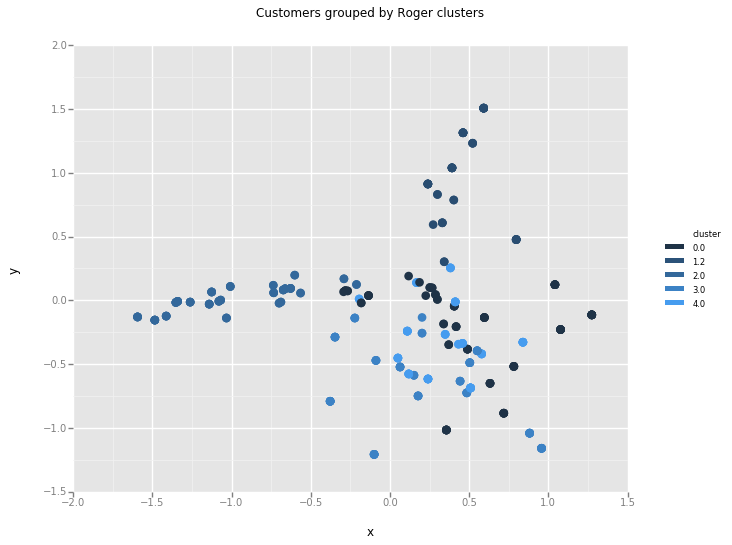

<ggplot: (-9223372036560793351)>

In [38]:
from ggplot import *

ggplot(df, aes(x='x', y = 'y', color = 'cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers grouped by Roger clusters")

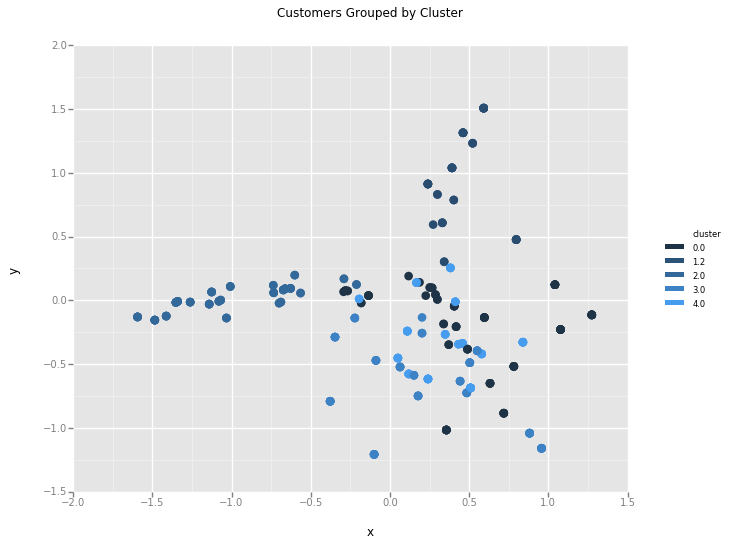

<ggplot: (-9223372036562317077)>

In [32]:
ggplot(df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")

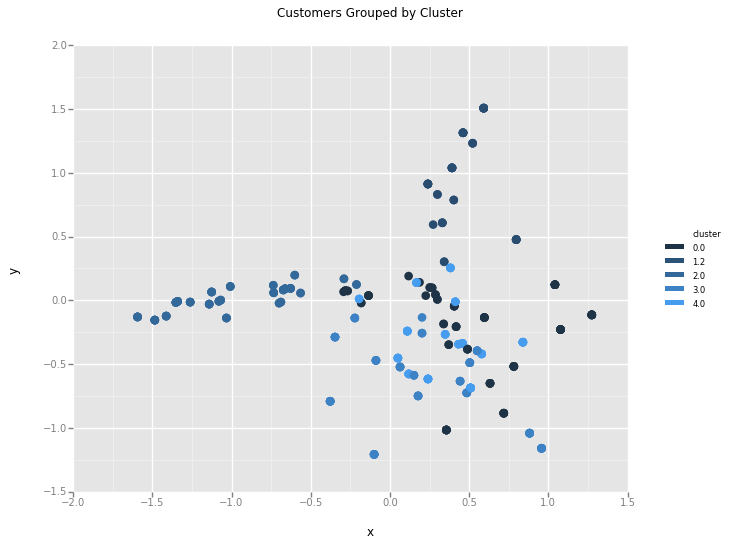

<ggplot: (293383183)>

In [33]:
df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)

from ggplot import *

ggplot(df, aes(x='x', y='y', color="cluster")) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")

**Your turn (extra credit):** Play with the following: 

* Different initializations for `KMeans`
* Other clustering algorithms in scikit-learn

In [39]:
sixcluster = KMeans(n_clusters = 6)
matrix['cluster2'] = sixcluster.fit_predict(matrix[matrix.columns[2:]])

In [40]:
matrix.columns

Index([        'index', 'customer_name',               1,               2,
                     3,               4,               5,               6,
                     7,               8,               9,              10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              28,              29,              30,
                    31,              32,       'cluster',             'x',
                   'y',      'cluster2'],
      dtype='object', name='offer_id')

In [41]:
matrix

offer_id,index,customer_name,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,cluster,x,y,cluster2
0,0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2,-1.007580,0.108215,1
1,1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.287539,0.044715,2
2,2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.392032,1.038391,4
3,3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2,-0.699477,-0.022542,1
4,4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,-0.088183,-0.471695,3
5,5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,0.485282,-0.725503,3
6,6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.591941,1.506500,4
7,7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2,-0.661732,0.090308,1
8,8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.118943,-0.577499,0
9,9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2,-1.079827,-0.007488,1


In [42]:
matrix.cluster2.value_counts()

1    26
2    22
4    16
3    16
0    14
5     6
Name: cluster2, dtype: int64